In [210]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

In [211]:
Vd = 400
Vc = Vd / 1.4
n_max = 6
n_min = -3

W = 8000 
S = 276
rho = 0.00256

fts_to_mih = 1/1.467

In [212]:
Cza_max = 2.07
Cza_min = -1.2

In [213]:
V = sp.Symbol('V')

In [214]:
#Diagrama V-n manobra

In [215]:
n_OA = Cza_max * ((rho * S * (V / fts_to_mih)**2)/(2 * W)) 
V_A = float(sp.solve(n_OA - n_max)[1])

In [216]:
n_OB = Cza_min * ((rho * S * (V / fts_to_mih)**2)/(2 * W)) 
V_B = float(sp.solve(n_OB - n_min)[1])

In [217]:
range_OA = np.linspace(0, V_A,1000)
nyOA = [n_OA.subs(V, i) for i in range_OA]
range_max_sup = np.linspace(V_A, Vd,1000)

range_OB = np.linspace(0, V_B, 1000)
nyOB = [n_OB.subs(V, i) for i in range_OB]
range_min_inf = np.linspace(V_B, Vd,1000)

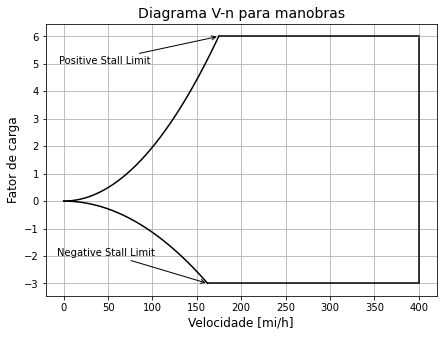

In [226]:
fig_diagrama = plt.figure(figsize=(7,5))

plt.plot(range_OA, nyOA, color = 'k')
plt.plot(range_OB, nyOB, color = 'k')

plt.plot(range_max_sup, n_max * np.ones(len(range_max_sup)), color = 'k')
plt.plot(range_min_inf, n_min * np.ones(len(range_min_inf)), color = 'k')

plt.axvline(400, ymin = 0.05, ymax = 0.95, color = 'k')

plt.annotate("Positive Stall Limit", xy = (float(V_A), n_max), xytext = (float(V_A) - 180, n_max - 1),
            arrowprops = dict(arrowstyle= '->'))

plt.annotate("Negative Stall Limit", xy = (float(V_B), n_min), xytext = (float(V_B) - 170, n_min + 1),
            arrowprops = dict(arrowstyle= '->'))

plt.xticks(np.linspace(0,400,9))
plt.yticks(np.linspace(n_min,n_max,10))

plt.xlabel("Velocidade [mi/h]", fontsize = 12)
plt.ylabel("Fator de carga", fontsize = 12)
plt.title("Diagrama V-n para manobras", fontsize = 14)
plt.grid()

plt.savefig("diagrama_vn_manobra.pdf")
plt.show()

In [219]:
#Diagrama V-n rajada

In [220]:
if W/S < 16:
    K_linha = 0.5 * (W/S)**.25
    
elif W/S > 16:
    K_linha = 1.33  - (2.67)/((W/S)**.75)

In [221]:
beta = (Cza_max - Cza_min) / (26 - - 17) 

V_stall_sup = 40 * K_linha
V_stall_inf = 40 * K_linha
V_mergulho = 15 * K_linha
V_cruzeiro = 30 * K_linha

In [222]:
#Para mergulho
delta_n_mergulho = (0.1 * beta * V_mergulho * V)/(W/S)

delta_n_cruzeiro = (0.1 * beta * V_cruzeiro * V)/(W/S)

delta_n_stall_sup = (0.1 * beta * V_stall_sup * V)/(W/S)

delta_n_stall_inf = (0.1 * beta * V_stall_inf * V)/(W/S)

In [223]:
range_delta_n_mergulho = np.linspace(0, Vd, 1000)
pos_ny_delta_n_mergulho = [1 + delta_n_mergulho.subs(V,i) for i in range_delta_n_mergulho]
neg_ny_delta_n_mergulho = [- 1* delta_n_mergulho.subs(V,i) for i in range_delta_n_mergulho]


range_delta_n_cruzeiro = np.linspace(0, Vc, 1000)
pos_ny_delta_n_cruzeiro = [1 + delta_n_cruzeiro.subs(V,i) for i in range_delta_n_cruzeiro]
neg_ny_delta_n_cruzeiro = [-1 * delta_n_cruzeiro.subs(V,i) for i in range_delta_n_cruzeiro]

range_delta_n_stall_sup = np.linspace(0, float(V_A), 1000)
pos_ny_delta_n_stall_sup = [1 + delta_n_stall_sup.subs(V,i) for i in range_delta_n_stall_sup]
neg_ny_delta_n_stall_sup = [-1*delta_n_stall_sup.subs(V,i) for i in range_delta_n_stall_sup]

range_delta_n_stall_inf = np.linspace(0, float(V_B), 1000)
pos_ny_delta_n_stall_inf = [1 + delta_n_stall_inf.subs(V,i) for i in range_delta_n_stall_inf]
neg_ny_delta_n_stall_inf = [-1 * delta_n_stall_inf.subs(V,i) for i in range_delta_n_stall_inf]

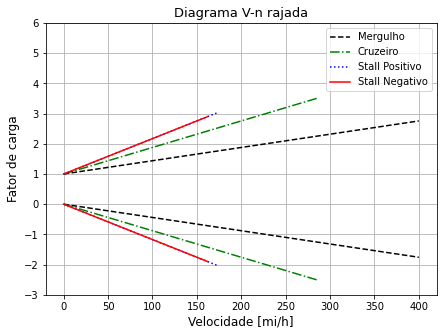

In [227]:
fig_rajada = plt.figure(figsize=(7,5))

plt.plot(range_delta_n_mergulho, pos_ny_delta_n_mergulho, color = 'k', ls = '--', label = "Mergulho")
plt.plot(range_delta_n_mergulho, neg_ny_delta_n_mergulho, color = 'k', ls = '--')

plt.plot(range_delta_n_cruzeiro, pos_ny_delta_n_cruzeiro, color = 'green', ls = '-.', label = "Cruzeiro")
plt.plot(range_delta_n_cruzeiro, neg_ny_delta_n_cruzeiro, color= 'green', ls = '-.')

plt.plot(range_delta_n_stall_sup, pos_ny_delta_n_stall_sup, color = 'blue', ls = 'dotted', label = "Stall Positivo")
plt.plot(range_delta_n_stall_sup, neg_ny_delta_n_stall_sup, color = 'blue', ls = 'dotted')

plt.plot(range_delta_n_stall_inf, pos_ny_delta_n_stall_inf, color = 'r',  label = "Stall Negativo")
plt.plot(range_delta_n_stall_inf, neg_ny_delta_n_stall_inf, color = 'r')

plt.xlabel("Velocidade [mi/h]", fontsize = 12)
plt.ylabel("Fator de carga", fontsize = 12)
plt.legend()
plt.title("Diagrama V-n rajada", fontsize = 13)

plt.xticks(np.linspace(0,400,9))
plt.yticks(np.linspace(n_min,n_max,10))

plt.grid()
plt.savefig("diagrama_vn_rajada.pdf")
plt.show()

In [250]:
Vc

285.7142857142857

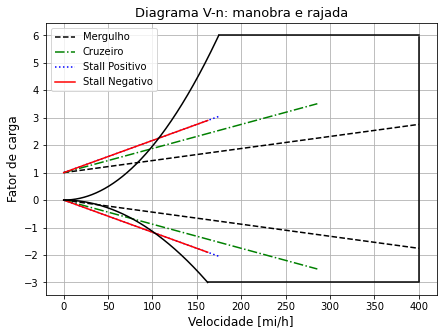

In [228]:
#Diagrama completo

fig_diagrama_vn = plt.figure(figsize=(7,5))

plt.plot(range_delta_n_mergulho, pos_ny_delta_n_mergulho, color = 'k', ls = '--', label = "Mergulho")
plt.plot(range_delta_n_mergulho, neg_ny_delta_n_mergulho, color = 'k', ls = '--')

plt.plot(range_delta_n_cruzeiro, pos_ny_delta_n_cruzeiro, color = 'green', ls = '-.', label = "Cruzeiro")
plt.plot(range_delta_n_cruzeiro, neg_ny_delta_n_cruzeiro, color= 'green', ls = '-.')

plt.plot(range_delta_n_stall_sup, pos_ny_delta_n_stall_sup, color = 'blue', ls = 'dotted', label = "Stall Positivo")
plt.plot(range_delta_n_stall_sup, neg_ny_delta_n_stall_sup, color = 'blue', ls = 'dotted')

plt.plot(range_delta_n_stall_inf, pos_ny_delta_n_stall_inf, color = 'r',  label = "Stall Negativo")
plt.plot(range_delta_n_stall_inf, neg_ny_delta_n_stall_inf, color = 'r')


plt.plot(range_OA, nyOA, color = 'k')
plt.plot(range_OB, nyOB, color = 'k')

plt.plot(range_max_sup, n_max * np.ones(len(range_max_sup)), color = 'k')
plt.plot(range_min_inf, n_min * np.ones(len(range_min_inf)), color = 'k')

plt.axvline(400, ymin = 0.05, ymax = 0.95, color = 'k')


plt.xlabel("Velocidade [mi/h]", fontsize = 12)
plt.ylabel("Fator de carga", fontsize = 12)
plt.legend()
plt.title("Diagrama V-n: manobra e rajada", fontsize = 13)
plt.grid()

plt.xticks(np.linspace(0,400,9))
plt.yticks(np.linspace(n_min,n_max,10))

plt.savefig("diagrama_vn_completo.pdf")
plt.show()